In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)
from sklearn.decomposition import PCA
%matplotlib inline
%colors Linux

In [2]:
df = pd.read_csv('/Users/markespina/Downloads/Fire_Incident_Dispatch_Data.csv',sep= ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755750 entries, 0 to 2755749
Data columns (total 29 columns):
STARFIRE_INCIDENT_ID              float64
INCIDENT_DATETIME                 object
ALARM_BOX_BOROUGH                 object
ALARM_BOX_NUMBER                  object
ALARM_BOX_LOCATION                object
INCIDENT_BOROUGH                  object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
COMMUNITYSCHOOLDISTRICT           float64
CONGRESSIONALDISTRICT             float64
ALARM_SOURCE_DESCRIPTION_TX       object
ALARM_LEVEL_INDEX_DESCRIPTION     object
HIGHEST_ALARM_LEVEL               object
INCIDENT_CLASSIFICATION           object
INCIDENT_CLASSIFICATION_GROUP     object
DISPATCH_RESPONSE_SECONDS_QY      object
FIRST_ASSIGNMENT_DATETIME         object
FIRST_ACTIVATION_DATETIME         object
FIRST_ON_SCENE_DATETIME           object
INCIDENT_CLOSE_DATE

In [4]:
# add number of Fire Houses in Zipcode where fire occured
firehouses = pd.read_csv('/Users/markespina/Downloads/FDNY_Firehouse_Listing.csv')

firehouses= firehouses.Postcode.value_counts().reset_index()

firehouses.columns =['ZIPCODE', 'FIREHOUSES']

firehouses.head()

,ZIPCODE,FIREHOUSES
0,10457.0,5
1,11221.0,4
2,11211.0,4
3,11205.0,3
4,10314.0,3


In [5]:
# add number of Fire Houses in Zipcode where fire occured
df = df.merge(firehouses, 'left', on ='ZIPCODE')

df.FIREHOUSES.replace(np.NAN, 0, inplace=True)

In [6]:
def missing_values(df):
    nulls = df.isnull().sum(axis=0).reset_index()
    nulls.columns = ['variable', 'missing values']
    nulls['filling factor (%)']=(df.shape[0]-nulls['missing values'])/df.shape[0]*100
    nulls.sort_values('filling factor (%)').reset_index(drop = True)
    return nulls

In [7]:
df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME, format ="%m/%d/%Y %H:%M:%S %p")

In [8]:

missing_values(df)

,variable,missing values,filling factor (%)
0,STARFIRE_INCIDENT_ID,20,99.999274
1,INCIDENT_DATETIME,0,100.000000
2,ALARM_BOX_BOROUGH,0,100.000000
3,ALARM_BOX_NUMBER,0,100.000000
4,ALARM_BOX_LOCATION,5,99.999819
5,INCIDENT_BOROUGH,0,100.000000
6,ZIPCODE,159223,94.222154
7,POLICEPRECINCT,159087,94.227089
8,CITYCOUNCILDISTRICT,160585,94.172730
9,COMMUNITYDISTRICT,159092,94.226907


## Processing the data:
need to convert features to appropiate datatypes
let's look at DataFrame

In [9]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755750 entries, 0 to 2755749
Data columns (total 30 columns):
STARFIRE_INCIDENT_ID              float64
INCIDENT_DATETIME                 datetime64[ns]
ALARM_BOX_BOROUGH                 object
ALARM_BOX_NUMBER                  object
ALARM_BOX_LOCATION                object
INCIDENT_BOROUGH                  object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
COMMUNITYSCHOOLDISTRICT           float64
CONGRESSIONALDISTRICT             float64
ALARM_SOURCE_DESCRIPTION_TX       object
ALARM_LEVEL_INDEX_DESCRIPTION     object
HIGHEST_ALARM_LEVEL               object
INCIDENT_CLASSIFICATION           object
INCIDENT_CLASSIFICATION_GROUP     object
DISPATCH_RESPONSE_SECONDS_QY      object
FIRST_ASSIGNMENT_DATETIME         object
FIRST_ACTIVATION_DATETIME         object
FIRST_ON_SCENE_DATETIME           object
INCIDENT_CL

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,FIREHOUSES
0,1.300121e+15,2013-01-01 12:00:20,BRONX,"2,147",ST ANN'S AVE & E138 ST,BRONX,10454.0,40.0,8.0,201.0,7.0,15.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,666,01/01/2013 12:11:26 AM,01/01/2013 12:12:01 AM,01/01/2013 12:14:23 AM,01/01/2013 12:20:06 AM,N,N,843,177,1,0,0,1.0
1,1.300108e+15,2013-01-01 12:00:37,MANHATTAN,818,11 AVE & 46 ST,MANHATTAN,10036.0,18.0,3.0,104.0,2.0,10.0,Private Fire Alarm,Initial Alarm,First Alarm,Alarm System - Defective,NonMedical Emergencies,56,01/01/2013 12:01:33 AM,01/01/2013 12:01:52 AM,01/01/2013 12:09:03 AM,01/01/2013 12:30:06 AM,N,Y,506,450,1,1,1,3.0
2,1.300197e+15,2013-01-01 12:01:17,QUEENS,"9,656",JAMAICA AVE & 117 ST,QUEENS,11418.0,102.0,29.0,409.0,27.0,5.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,8,01/01/2013 12:01:25 AM,01/01/2013 12:01:43 AM,01/01/2013 12:04:55 AM,01/01/2013 12:15:18 AM,N,Y,218,210,1,0,0,2.0
3,1.300140e+15,2013-01-01 12:01:49,QUEENS,"4,019",WYCKOFF AVE & DECATUR ST,QUEENS,11385.0,104.0,34.0,405.0,24.0,7.0,Private Fire Alarm,Initial Alarm,First Alarm,Alarm System - Defective,NonMedical Emergencies,77,01/01/2013 12:03:06 AM,01/01/2013 12:03:19 AM,01/01/2013 12:06:27 AM,01/01/2013 12:24:56 AM,N,Y,278,201,3,2,1,2.0
4,1.300174e+15,2013-01-01 12:02:32,QUEENS,"7,412",BROADWAY & 44 ST,QUEENS,11103.0,114.0,26.0,401.0,30.0,14.0,UCT/911,Initial Alarm,First Alarm,Utility Emergency - Gas,NonMedical Emergencies,22,01/01/2013 12:02:54 AM,01/01/2013 12:03:14 AM,01/01/2013 12:07:48 AM,01/01/2013 12:40:11 AM,N,Y,316,294,2,1,1,1.0


In [10]:
## missing, unnecessary Records
datetimes = [x for x in df.columns if x.endswith('DATETIME')]
dispatch_logs = df[datetimes+['INCIDENT_RESPONSE_SECONDS_QY']]
dispatch_logs

,INCIDENT_DATETIME,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY
0,2013-01-01 12:00:20,01/01/2013 12:11:26 AM,01/01/2013 12:12:01 AM,01/01/2013 12:14:23 AM,01/01/2013 12:20:06 AM,843
1,2013-01-01 12:00:37,01/01/2013 12:01:33 AM,01/01/2013 12:01:52 AM,01/01/2013 12:09:03 AM,01/01/2013 12:30:06 AM,506
2,2013-01-01 12:01:17,01/01/2013 12:01:25 AM,01/01/2013 12:01:43 AM,01/01/2013 12:04:55 AM,01/01/2013 12:15:18 AM,218
3,2013-01-01 12:01:49,01/01/2013 12:03:06 AM,01/01/2013 12:03:19 AM,01/01/2013 12:06:27 AM,01/01/2013 12:24:56 AM,278
4,2013-01-01 12:02:32,01/01/2013 12:02:54 AM,01/01/2013 12:03:14 AM,01/01/2013 12:07:48 AM,01/01/2013 12:40:11 AM,316
5,2013-01-01 12:02:45,01/01/2013 12:03:21 AM,01/01/2013 12:03:30 AM,01/01/2013 12:07:55 AM,01/01/2013 12:18:20 AM,310
6,2013-01-01 12:03:55,01/01/2013 12:04:04 AM,01/01/2013 12:04:22 AM,01/01/2013 12:13:10 AM,01/01/2013 12:30:33 AM,555
7,2013-01-01 12:04:03,01/01/2013 12:04:16 AM,01/01/2013 12:04:29 AM,01/01/2013 12:06:19 AM,01/01/2013 12:11:21 AM,136
8,2013-01-01 12:04:37,01/01/2013 12:04:59 AM,01/01/2013 12:05:12 AM,01/01/2013 12:11:02 AM,01/01/2013 12:23:29 AM,385
9,2013-01-01 12:04:38,01/01/2013 12:05:23 AM,01/01/2013 12:05:45 AM,01/01/2013 12:13:25 AM,01/01/2013 12:16:23 AM,527


In [12]:
# check logs with response time of 0 to check for cancelled/unassigned incidents
no_response = dispatch_logs[dispatch_logs.FIRST_ON_SCENE_DATETIME.isnull()]
no_response

,INCIDENT_DATETIME,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY
16,2013-01-01 12:09:57,01/01/2013 12:10:02 AM,01/01/2013 12:11:30 AM,NaN,01/01/2013 12:12:58 AM,0
26,2013-01-01 12:18:52,01/01/2013 12:18:56 AM,01/01/2013 12:19:18 AM,NaN,01/01/2013 12:21:11 AM,0
31,2013-01-01 12:21:05,01/01/2013 12:21:08 AM,01/01/2013 12:21:31 AM,NaN,01/01/2013 12:23:05 AM,0
32,2013-01-01 12:21:19,01/01/2013 12:26:56 AM,01/01/2013 12:27:35 AM,NaN,01/01/2013 12:27:42 AM,0
35,2013-01-01 12:22:38,01/01/2013 12:23:40 AM,01/01/2013 12:24:07 AM,NaN,01/01/2013 12:39:30 AM,0
47,2013-01-01 12:27:16,01/01/2013 12:27:39 AM,01/01/2013 12:28:01 AM,NaN,01/01/2013 12:29:57 AM,0
62,2013-01-01 12:37:25,01/01/2013 12:37:38 AM,01/01/2013 12:37:52 AM,NaN,01/01/2013 12:39:44 AM,0
90,2013-01-01 12:48:28,01/01/2013 12:48:48 AM,01/01/2013 12:49:00 AM,NaN,01/01/2013 12:52:29 AM,0
104,2013-01-01 12:57:58,01/01/2013 01:02:04 AM,01/01/2013 01:03:07 AM,NaN,01/01/2013 01:04:28 AM,0
113,2013-01-01 01:05:37,01/01/2013 01:05:55 AM,01/01/2013 01:06:19 AM,NaN,01/01/2013 01:08:42 AM,0


### Looks like  dispatch keeps logs of requests that don't end up sending out units, we'll drop these records later


### Now let's address other missing data

In [13]:
# deal with missing zipcodes, other loaction data
for data in df.select_dtypes([np.int64])  :
    if len(df[data])< df.shape[0]:
        df[data].fillna(0.0, inplace=True)

In [14]:
# clean target to int for visualisation
df.INCIDENT_RESPONSE_SECONDS_QY = df.INCIDENT_RESPONSE_SECONDS_QY.str.replace(',',"")

df.INCIDENT_RESPONSE_SECONDS_QY = df.INCIDENT_RESPONSE_SECONDS_QY.astype('int64')
    
df.INCIDENT_TRAVEL_TM_SECONDS_QY = df.INCIDENT_TRAVEL_TM_SECONDS_QY.str.replace(',',"")

df.INCIDENT_TRAVEL_TM_SECONDS_QY = df.INCIDENT_TRAVEL_TM_SECONDS_QY.astype('int64')

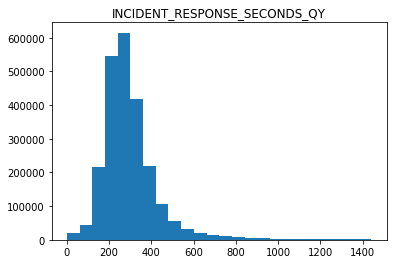

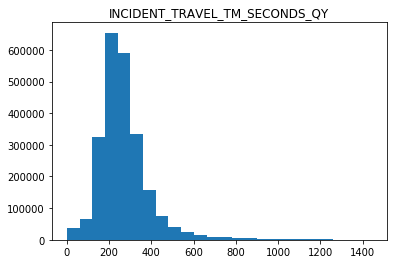

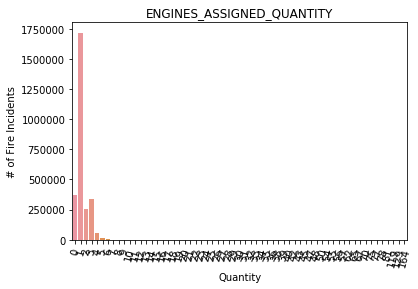

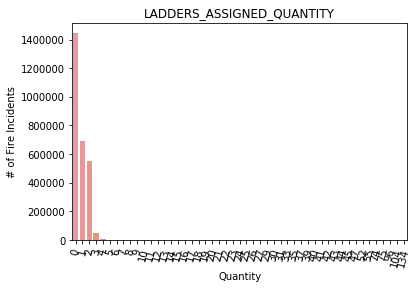

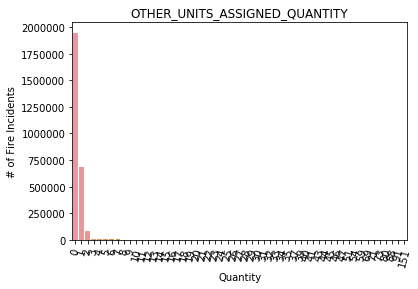

In [15]:
for col in df.select_dtypes([np.int64]):
    if col.endswith('QY'):
        df[col].hist(bins=[x for x in range(1, 1450, 60)], grid=False)
        plt.title(col)
        plt.show()
    else:
        data = df[col].value_counts().reset_index()
        data.columns = ['Quantity', '# of Fire Incidents']
        sns.barplot(x = 'Quantity', y = '# of Fire Incidents', data = data.sort_values('Quantity'))
        plt.xticks(rotation=75)
        plt.title(col)
        plt.show()
        

# Response times under 10 mins are normally distributed

## distritibution of fire fighter resorce assingment is skewed heavily to the right

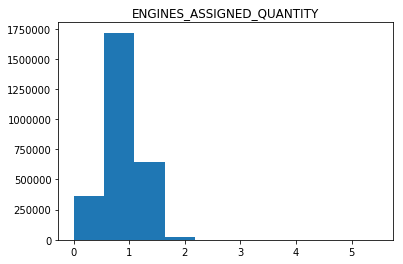

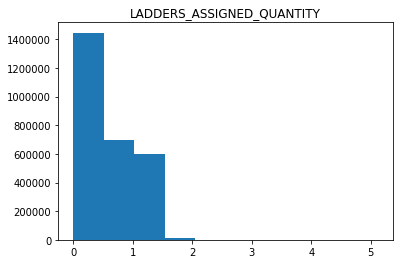

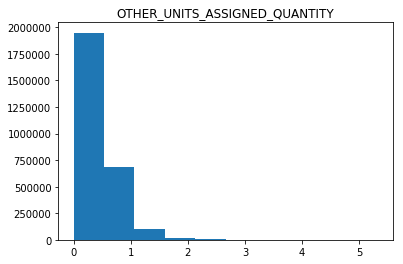

In [16]:
# let's transform right skewed vars with cube root

for col in df.columns:
    if col.endswith('QUANTITY'):
        plt.subplots()
        plt.hist(df[col]**(1/3))
        plt.title(col)

In [17]:
# sqrt of num of engines looks most normal
df['CBRT_ENGINES'] = df['ENGINES_ASSIGNED_QUANTITY']**(1/3)

In [18]:
def minutes(secs):
    if secs >= 60:
        return secs//60+((secs%60)*.01)
    else:
        return (secs%60)*.01

# convert target variable
df['TRAVEL_TIME_MIN'] = df.INCIDENT_TRAVEL_TM_SECONDS_QY.apply(lambda x: minutes(x))
df['INCIDENT_RESPONSE_TIME_MIN'] = df.INCIDENT_RESPONSE_SECONDS_QY.apply(lambda x: minutes(x))


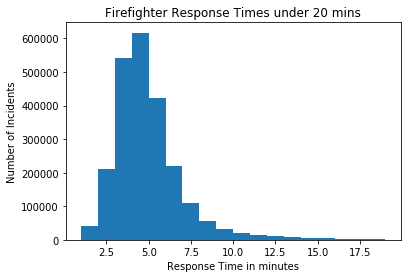

In [19]:
df.INCIDENT_RESPONSE_TIME_MIN.hist(bins = [x for x in range(1, 20)],  grid=False)
plt.title('Firefighter Response Times under 20 mins')
plt.ylabel('Number of Incidents')
plt.xlabel('Response Time in minutes')
plt.show()

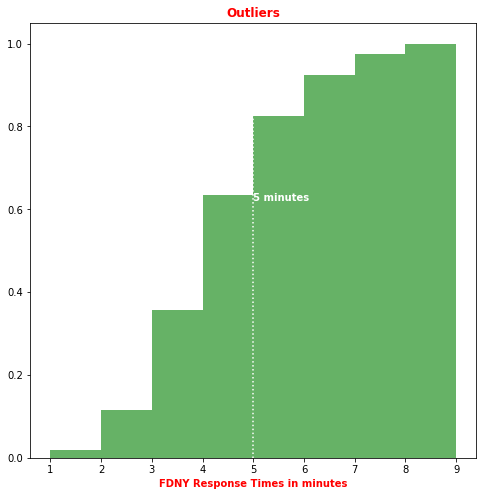

In [20]:
## Target has long tail after 10 minutes, let's look at the Cunmulative Distribution

fig, ax  = plt.subplots(figsize=(8,8))
df[df['INCIDENT_RESPONSE_TIME_MIN']<10].INCIDENT_RESPONSE_TIME_MIN.hist(bins=[x for x in range(1, 10, 1)],\
                                                                        cumulative=True, density=True, grid=False, color='g', alpha=.6, ax=ax)


plt.axvline(5, 0, linestyle =':', color ='w')
plt.text(5, .62,'5 minutes', fontweight='bold', color = 'w')
plt.title('Outliers', fontweight='bold',  color='r')
plt.xlabel('FDNY Response Times in minutes', fontweight='bold',  color='r')
plt.show()

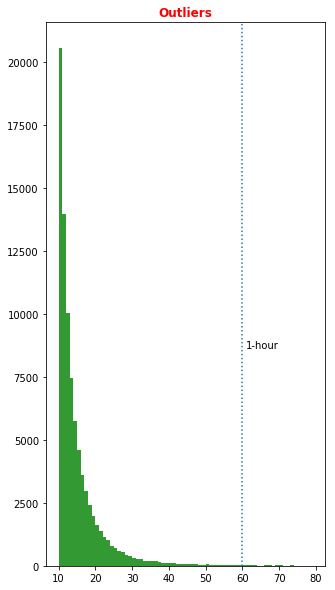

In [21]:
plt.subplots(figsize=(5,10))
df[df['INCIDENT_RESPONSE_TIME_MIN']>10].INCIDENT_RESPONSE_TIME_MIN.hist(bins=[x for x in range(10, 80, 1)], grid=False, color='g', alpha=.8)
plt.axvline(60, 0, linestyle =':')
plt.text(61,8650,'1-hour', )
plt.title('Outliers', fontweight='bold',  color='r')
plt.show()

In [22]:
# filter outliers with over 10 minute response time and drop records with no response
valid_response = df.INCIDENT_RESPONSE_TIME_MIN>0
filter_outliers = df.INCIDENT_RESPONSE_TIME_MIN<=10
df_clean = df[(valid_response)&(filter_outliers)]


In [23]:
"""aggregated street level location contain most unique values, 
offers most infomation if difference in Response by location"""
df[df.INCIDENT_RESPONSE_TIME_MIN<=10].groupby('ALARM_BOX_LOCATION').INCIDENT_RESPONSE_TIME_MIN.mean().sort_values(ascending=False).reset_index()

,ALARM_BOX_LOCATION,INCIDENT_RESPONSE_TIME_MIN
0,"JHS 145, 34 AVE & 80 ST",10.000000
1,GATEWAY PARK BROAD CHNL JAMAICA BAY ZONE,9.580000
2,FDR DRIVE OPP E 67 ST,9.580000
3,HPTM AVE E & 3 ST-VIA HALLECK ST,9.390000
4,TUNNEL EXIT SUNNYSIDE YARDS,9.280000
5,PS 178 RADNOR RD BET 189 & 190 STS,9.220000
6,SOUTH CONDUIT AVE & 78 ST,9.090000
7,MARTIN LUTHER KING SCHOOL 65 ST & AMST.,9.060000
8,DELTA TERM-LAGUARDIA-VIA 94 ST,9.040000
9,MED CTR SCHENCTDY AV BTW RUTLAND & WINTH,9.000000


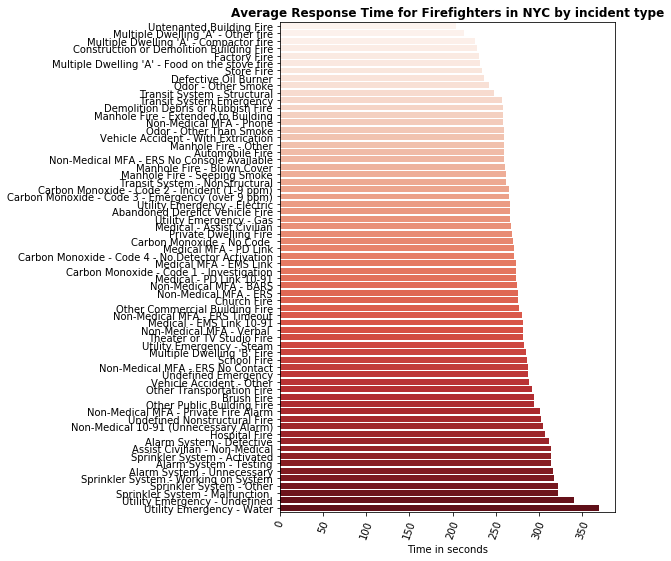

In [24]:
# After location, Incidicent_type seems to have influence on Respons Time 
data = df_clean.groupby('INCIDENT_CLASSIFICATION').INCIDENT_RESPONSE_SECONDS_QY.mean().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6,9))

sns.barplot(x = 'INCIDENT_RESPONSE_SECONDS_QY', y = 'INCIDENT_CLASSIFICATION' , data=data, palette='Reds')
plt.title('Average Response Time for Firefighters in NYC by incident type', fontweight= 'bold')
plt.xticks(rotation=70)

plt.xlabel('Time in seconds')
plt.ylabel("")
plt.show()

In [25]:
# create new features to cluster incidents for avg 
df_clean['FAST_CLASS'] = np.where(df_clean['INCIDENT_CLASSIFICATION'].str.contains('(Medical|Other|Undefined|Dwelling)'), 0,1)

df_clean['AVG_CLASS'] = np.where(df_clean['INCIDENT_CLASSIFICATION'].str.contains('(fire|System|Structural)'), 1,0)

df_clean['SLOW_CLASS'] = np.where(df_clean['INCIDENT_CLASSIFICATION'].str.contains('(Utility|Alarm|Vehicle)'), 1,0)




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [26]:
classes = pd.get_dummies(df_clean["INCIDENT_CLASSIFICATION"])

classes['Target'] = df_clean['INCIDENT_RESPONSE_SECONDS_QY']

classes['FAST_CLASS'], classes['AVG_CLASS'], classes['SLOW_CLASS'] = \
                                df_clean['FAST_CLASS'], df_clean['AVG_CLASS'], df_clean['SLOW_CLASS']

In [27]:
classes.corr().loc[:, 'Target'].sort_values(ascending=False).head(15)

Target                                   1.000000
Utility Emergency - Water                0.163640
Assist Civilian - Non-Medical            0.142065
SLOW_CLASS                               0.113835
FAST_CLASS                               0.078542
Alarm System - Defective                 0.066095
Alarm System - Unnecessary               0.058169
Alarm System - Testing                   0.029813
AVG_CLASS                                0.027420
Sprinkler System - Malfunction           0.022668
Sprinkler System - Working on System     0.016888
Non-Medical MFA - Private Fire Alarm     0.014583
Non-Medical 10-91 (Unnecessary Alarm)    0.014205
Vehicle Accident - Other                 0.014106
Utility Emergency - Undefined            0.009229
Name: Target, dtype: float64

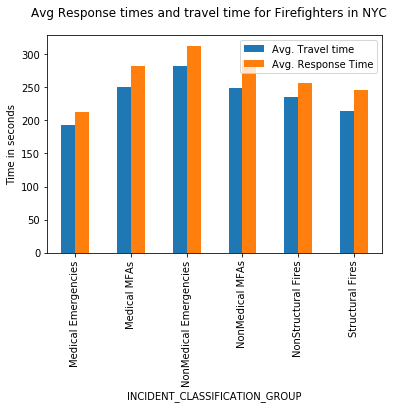

In [28]:
df2 = df[['INCIDENT_CLASSIFICATION_GROUP', 'INCIDENT_TRAVEL_TM_SECONDS_QY','INCIDENT_RESPONSE_SECONDS_QY']]

response_times = df2.groupby('INCIDENT_CLASSIFICATION_GROUP').INCIDENT_RESPONSE_SECONDS_QY.mean()
travel_times = df2.groupby('INCIDENT_CLASSIFICATION_GROUP').INCIDENT_TRAVEL_TM_SECONDS_QY.mean()
#index = df2['INCIDENT_CLASSIFICATION_GROUP'].unique()
times_by_incident_type = pd.DataFrame({'Avg. Travel time': travel_times,\
                    'Avg. Response Time': response_times})#, index=index)
#plt.xtick
times_by_incident_type.plot.bar(rot=90)
plt.suptitle('Avg Response times and travel time for Firefighters in NYC')
plt.ylabel('Time in seconds')
plt.show()

In [30]:
## Let's Look at time component Data, assign new feature fromdatetime attrbites

df_clean['INCIDENT_DATE'] = df_clean['INCIDENT_DATETIME'].dt.date
df_clean['INCIDENT_YEAR'] = df_clean['INCIDENT_DATETIME'].dt.year
df_clean['INCIDENT_MONTH'] = df_clean['INCIDENT_DATETIME'].dt.month
df_clean['INCIDENT_DAY'] = df_clean['INCIDENT_DATETIME'].dt.day
df_clean['INCIDENT_HOUR'] = df_clean['INCIDENT_DATETIME'].dt.hour
df_clean['INCIDENT_DAYOFWEEK'] = df_clean['INCIDENT_DATETIME'].dt.dayofweek
df_clean['INCIDENT_DAYOFYEAR'] = df_clean['INCIDENT_DATETIME'].dt.dayofyear

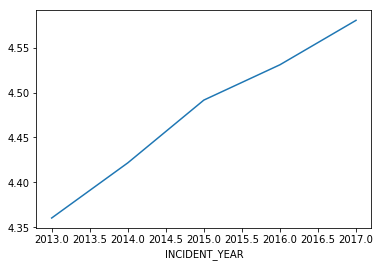

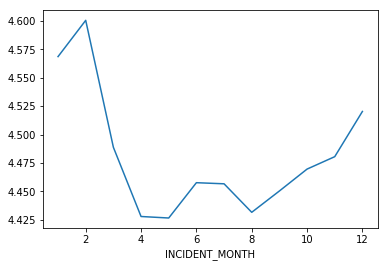

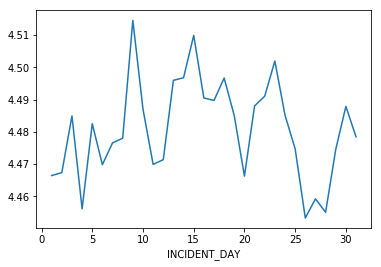

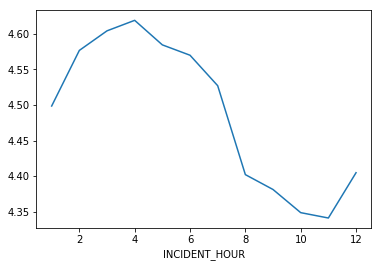

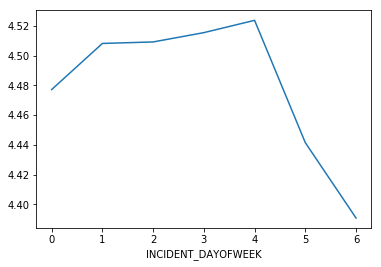

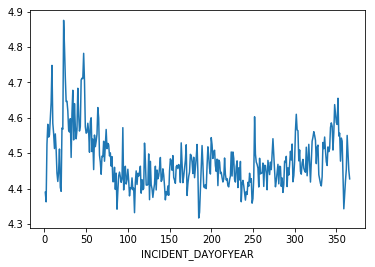

In [31]:
time_components = ['INCIDENT_YEAR','INCIDENT_MONTH','INCIDENT_DAY','INCIDENT_HOUR',
                   'INCIDENT_DAYOFWEEK','INCIDENT_DAYOFYEAR' ]

for feat in time_components:
    plt.subplots()
    df_clean.groupby(feat).INCIDENT_RESPONSE_TIME_MIN.mean().plot()

In [32]:
weekend_times = df_clean[df_clean['INCIDENT_DAYOFWEEK'].isin([5,6])].INCIDENT_RESPONSE_TIME_MIN
not_weekend_times = df_clean[df_clean['INCIDENT_DAYOFWEEK'].isin([5,6])==False].INCIDENT_RESPONSE_TIME_MIN

winter_months = df_clean[df_clean['INCIDENT_MONTH'].isin([12,1,2])].INCIDENT_RESPONSE_TIME_MIN
not_winter = df_clean[df_clean['INCIDENT_MONTH'].isin([12,1,2])==False].INCIDENT_RESPONSE_TIME_MIN

early = df_clean[df_clean['INCIDENT_HOUR']<10].INCIDENT_RESPONSE_TIME_MIN
not_early = df_clean[df_clean['INCIDENT_HOUR']>=10].INCIDENT_RESPONSE_TIME_MIN

In [33]:
from scipy.stats import ttest_ind
print('T_test Response Times: Weekend vs. weekday:\n', ttest_ind(weekend_times,not_weekend_times, equal_var=False))
print('T_test Response Times:Winter vs. Other Seasons:\n', ttest_ind(winter_months,not_winter, equal_var=False))

print('T_test Response Times: Before 10 vs. After 10', ttest_ind(early,not_early, equal_var=False))



T_test Response Times: Weekend vs. weekday:
 Ttest_indResult(statistic=-38.835014352913035, pvalue=0.0)
T_test Response Times:Winter vs. Other Seasons:
 Ttest_indResult(statistic=43.35541623232768, pvalue=0.0)
T_test Response Times: Before 10 vs. After 10 Ttest_indResult(statistic=65.50589072105895, pvalue=0.0)


In [34]:
df_clean['EARLY_MORNING'] = np.where(df_clean['INCIDENT_HOUR']<9, 1, 0)

df_clean['IS_WEEKEND'] = np.where(df_clean['INCIDENT_DAYOFWEEK'].isin([5,6]), 1, 0)

df_clean['NOT_WINTER'] = np.where(df_clean['INCIDENT_MONTH'].isin([12,1,2])==False,1,0)

In [35]:
df_clean['ALARM_BOX_LOCATION'] = pd.factorize(df_clean['ALARM_BOX_LOCATION'])[0]

In [36]:
features = ['FAST_CLASS', 'AVG_CLASS', 'SLOW_CLASS','ALARM_BOX_LOCATION', 'INCIDENT_CLASSIFICATION', 'INCIDENT_CLASSIFICATION_GROUP', 'CBRT_ENGINES',
       'ZIPCODE','FIREHOUSES', 'EARLY_MORNING', 'INCIDENT_YEAR'
       'INCIDENT_BOROUGH', 'IS_WEEKEND', 'NOT_WINTER']

In [37]:
df_clean.ZIPCODE.replace(np.NaN, 0.0, inplace=True)

In [38]:
df_clean['RESPONSE_BINARY'] = df_clean.INCIDENT_RESPONSE_TIME_MIN.apply(lambda x: 1 if x < 5.0 else 0)

In [39]:
features = ['FAST_CLASS', 'AVG_CLASS', 'SLOW_CLASS','ALARM_BOX_LOCATION', 'CBRT_ENGINES',
       'ZIPCODE','FIREHOUSES', 'EARLY_MORNING', 'INCIDENT_YEAR',
    'IS_WEEKEND', 'NOT_WINTER']

X = df_clean[features+['INCIDENT_RESPONSE_TIME_MIN']]


In [40]:
violation_lookup = pd.read_csv('/Users/markespina/Desktop/housing_violations_by_zip_2012-16.csv')
violation_lookup['CBRT_BUILDINGS']= violation_lookup['FLAGGED_BUILDINGS']**(1/3)

In [41]:
df_clean = df_clean.merge(violation_lookup, on=['ZIPCODE', 'INCIDENT_YEAR'], how= 'left')

Text(0.5,1,'Cubed Root transformation ')

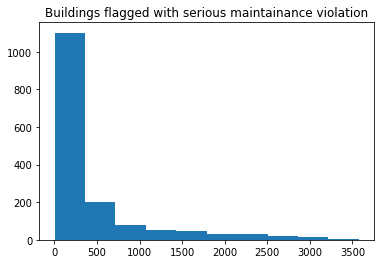

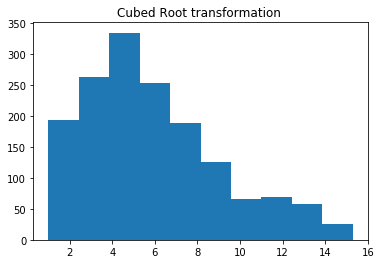

In [42]:
plt.subplots()
violation_lookup['FLAGGED_BUILDINGS'].hist(grid = False)
plt.title('Buildings flagged with serious maintainance violation')
plt.subplots()
violation_lookup['CBRT_BUILDINGS'].hist(grid = False)

plt.title('Cubed Root transformation ')

In [43]:
X = df_clean[features+['CBRT_BUILDINGS','INCIDENT_RESPONSE_TIME_MIN']]


In [44]:
y= df_clean['RESPONSE_BINARY']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [46]:
lookup = X_train.groupby('ALARM_BOX_LOCATION').INCIDENT_RESPONSE_TIME_MIN.mean().sort_values(ascending=False).reset_index()
lookup.columns = ['ALARM_BOX_LOCATION', 'AVG_INCIDENT_RESPONSE_TIME_MIN']


In [47]:
lookup

,ALARM_BOX_LOCATION,AVG_INCIDENT_RESPONSE_TIME_MIN
0,19390,10.000000
1,19572,9.580000
2,19446,9.580000
3,18903,9.470000
4,18984,9.410000
5,19589,9.390000
6,18784,9.360000
7,17310,9.360000
8,13178,9.330000
9,18934,9.280000


In [48]:
X_train = pd.merge(X_train, lookup, how='left', on='ALARM_BOX_LOCATION')


In [49]:
missing_values(X_train)

,variable,missing values,filling factor (%)
0,FAST_CLASS,0,100.000000
1,AVG_CLASS,0,100.000000
2,SLOW_CLASS,0,100.000000
3,ALARM_BOX_LOCATION,0,100.000000
4,CBRT_ENGINES,0,100.000000
5,ZIPCODE,0,100.000000
6,FIREHOUSES,0,100.000000
7,EARLY_MORNING,0,100.000000
8,INCIDENT_YEAR,0,100.000000
9,IS_WEEKEND,0,100.000000


In [50]:
X_test = pd.merge(X_test, lookup, how='left', on='ALARM_BOX_LOCATION')

In [51]:
missing_values(X_test)


,variable,missing values,filling factor (%)
0,FAST_CLASS,0,100.000000
1,AVG_CLASS,0,100.000000
2,SLOW_CLASS,0,100.000000
3,ALARM_BOX_LOCATION,0,100.000000
4,CBRT_ENGINES,0,100.000000
5,ZIPCODE,0,100.000000
6,FIREHOUSES,0,100.000000
7,EARLY_MORNING,0,100.000000
8,INCIDENT_YEAR,0,100.000000
9,IS_WEEKEND,0,100.000000


In [52]:
from statistics import mode

In [53]:
X_train.CBRT_BUILDINGS.fillna(mode(X_train['CBRT_BUILDINGS']), inplace=True)
X_test.CBRT_BUILDINGS.fillna(mode(X_train['CBRT_BUILDINGS']), inplace=True)
X_test.AVG_INCIDENT_RESPONSE_TIME_MIN.fillna(mode(X_train['AVG_INCIDENT_RESPONSE_TIME_MIN']), inplace=True)

In [54]:
for data in [X_train, X_test]:
    data.drop(['INCIDENT_RESPONSE_TIME_MIN'], 1, inplace=True)

In [55]:
X_train.head()

,FAST_CLASS,AVG_CLASS,SLOW_CLASS,ALARM_BOX_LOCATION,CBRT_ENGINES,ZIPCODE,FIREHOUSES,EARLY_MORNING,INCIDENT_YEAR,IS_WEEKEND,NOT_WINTER,CBRT_BUILDINGS,AVG_INCIDENT_RESPONSE_TIME_MIN
0,0,0,0,252,1.0,10468.0,0.0,0,2017,0,1,13.515757,4.547807
1,1,1,1,7204,1.0,11232.0,1.0,1,2013,0,1,5.905941,3.744675
2,0,0,0,471,1.0,10026.0,0.0,1,2014,0,0,7.337234,4.392376
3,1,0,1,16832,0.0,11362.0,0.0,1,2016,1,1,1.442250,6.084840
4,1,0,1,16935,0.0,11370.0,0.0,0,2013,0,0,3.448217,5.085962


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7205862960227872

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [65]:
y_pred = rfc.predict(X_test)
print(('Random Forest reduced results'))
print(rfc.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest reduced results
0.7210742166895242
[[ 99956  69391]
 [ 57518 228127]]
             precision    recall  f1-score   support

          0       0.63      0.59      0.61    169347
          1       0.77      0.80      0.78    285645

avg / total       0.72      0.72      0.72    454992



In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


name_of_cols = X_test.columns.values


# Print the feature ranking
print("Feature ranking:")
reduced_feature_index =[]
for f in range((len(X.head(25)))):
    print("%d. feature %d - %s (%f)" % (f, 
                                        indices[f], name_of_cols[int(indices[f])],
                                        importances[indices[f]]))
    reduced_feature_index.append(indices[f])

In [ ]:
reduced_features = [X_train.columns[i] for i in reduced_feature_index]

reduced_X_train = X_train[reduced_features]
reduced_X_test = X_test[reduced_features]

In [66]:
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [70]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100548  68799]
 [ 57471 228174]]
             precision    recall  f1-score   support

          0       0.64      0.59      0.61    169347
          1       0.77      0.80      0.78    285645

avg / total       0.72      0.72      0.72    454992



In [71]:
knn.score(X_test, y_test)

0.722478636987024

In [57]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [60]:
lr = LogisticRegression(penalty='l2', C=1e9)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.743920772233358
[[ 91630  77717]
 [ 38797 246848]]
             precision    recall  f1-score   support

          0       0.70      0.54      0.61    169347
          1       0.76      0.86      0.81    285645

avg / total       0.74      0.74      0.74    454992



In [61]:
predicted = lr.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

In [63]:
ridge = RidgeClassifier(alpha=15)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7454680521855329

In [64]:
y_pred = ridge.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 91629  77718]
 [ 38092 247553]]
             precision    recall  f1-score   support

          0       0.71      0.54      0.61    169347
          1       0.76      0.87      0.81    285645

avg / total       0.74      0.75      0.74    454992



In [80]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [ ]:
tree = DecisionTreeClassifier(max_depth=2)
tree2_boost = AdaBoostClassifier(base_estimator=tree)
tree2_boost.fit(X_train, y_train)

In [ ]:
tree2_boost.score(X_test, y_test)

In [ ]:
tree2_boost.score(X_test, y_test)

In [98]:
X_train.columns

Index(['FAST_CLASS', 'AVG_CLASS', 'SLOW_CLASS', 'ALARM_BOX_LOCATION', 'CBRT_ENGINES', 'ZIPCODE', 'FIREHOUSES', 'EARLY_MORNING', 'INCIDENT_YEAR', 'IS_WEEKEND', 'NOT_WINTER', 'CBRT_BUILDINGS', 'AVG_INCIDENT_RESPONSE_TIME_MIN'], dtype='object')

In [81]:
tree = DecisionTreeClassifier(max_depth=3)
reduced_boost = AdaBoostClassifier(base_estimator=tree)
reduced_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [87]:
y_pred = reduced_boost.predict(X_test)
print(reduced_boost.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7515934346098393
[[ 96515  72832]
 [ 40191 245454]]
             precision    recall  f1-score   support

          0       0.71      0.57      0.63    169347
          1       0.77      0.86      0.81    285645

avg / total       0.75      0.75      0.75    454992



In [ ]:
model_iter1 = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.05,  
                      colsample_bytree = 0.8,
                      subsample = 1,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_lambda=1,
                      max_depth=4, 
                      gamma=0)